## 다중클래스분류 
* callback 사용해 과적합 막고 최고성능 모델 저장

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
data = pd.read_csv('./data/winequality-white.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
data['quality'].value_counts(normalize=True)*100

quality
6    44.875459
5    29.746835
7    17.966517
8     3.572887
4     3.327889
3     0.408330
9     0.102082
Name: proportion, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [8]:
X = data.drop('quality', axis=1)
y = data['quality']

In [9]:
X.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8


In [12]:
y = pd.get_dummies(y)

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=42, stratify=y_valid)

In [20]:
rs = RobustScaler()
rs_X_train = pd.DataFrame(rs.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
rs_X_valid = pd.DataFrame(rs.transform(X_valid), columns=X_valid.columns, index=X_valid.index)
rs_X_test = pd.DataFrame(rs.transform(X_test), columns=X_test.columns, index=X_test.index)

# 모델을 최고 성능에서 저장하고 중지하기

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [23]:
model = Sequential()
model.add(Input(shape=(rs_X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,495 (13.65 KB)

 Trainable params: 3,495 (13.65 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
import os

Epoch 1/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7219 - loss: 0.7075 - val_accuracy: 0.5776 - val_loss: 1.1406
Epoch 2/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7367 - loss: 0.6860 - val_accuracy: 0.5776 - val_loss: 1.1154
Epoch 3/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7221 - loss: 0.6887 - val_accuracy: 0.5633 - val_loss: 1.1556
Epoch 4/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7284 - loss: 0.6892 - val_accuracy: 0.5786 - val_loss: 1.1330
Epoch 5/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7252 - loss: 0.6895 - val_accuracy: 0.5724 - val_loss: 1.1443
Epoch 6/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7358 - loss: 0.6859 - val_accuracy: 0.5765 - val_loss: 1.1610
Epoch 7/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7404 - loss: 0.6721 - val_accuracy: 0.5704 - val_loss: 1.1438
Epoch 8/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7337 - loss: 0.6619 - val_accuracy: 0

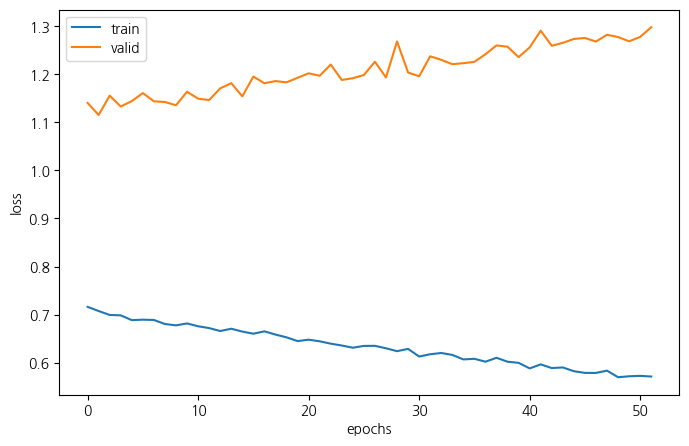

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience=50)
os.makedirs('./model', exist_ok=True) # 디렉토리 자동 생성
filepath = './model/whitewine_loss_{val_loss:.4f}__epoch_{epoch:04d}.keras'
model_save = ModelCheckpoint(filepath, save_best_only=True)
history = model.fit(rs_X_train, y_train, epochs=1000, 
                    batch_size=32, validation_data=(rs_X_valid, y_valid),
                    callbacks=[early_stop, model_save])
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.show()

# 데이터 증폭 후 분석
* 데이터 증폭 + 스케일러 사용 시
* 데이터 증폭 후 스케일러로 스케일링

In [31]:
from imblearn.over_sampling import SMOTE

In [34]:
X = data.drop('quality',axis=1)
y = data['quality']

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=42, stratify=y_valid)

In [58]:
smt = SMOTE(k_neighbors=2, n_jobs=-1, random_state=42)
smt_X_train, smt_y_train = smt.fit_resample(X_train, y_train)
smt_X_train = pd.DataFrame(smt_X_train, columns=X_train.columns)
smt_y_train = pd.Series(smt_y_train)

/home/ceun2/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/ceun2/miniforge3/envs/tf/lib/python3.9/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [60]:
ot_smt_y_train = pd.get_dummies(smt_y_train)

In [41]:
y_valid = pd.get_dummies(y_valid)
y_test = pd.get_dummies(y_test)

In [62]:
rs = RobustScaler()
rs_X_train = pd.DataFrame(rs.fit_transform(smt_X_train), columns=X_train.columns, index=smt_X_train.index)
rs_X_valid = pd.DataFrame(rs.transform(X_valid), columns=X_valid.columns, index=X_valid.index)
rs_X_test = pd.DataFrame(rs.transform(X_test), columns=X_test.columns, index=X_test.index)

In [46]:
model = Sequential()
model.add(Input(shape=(smt_X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(ot_smt_y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,495 (13.65 KB)

 Trainable params: 3,495 (13.65 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3843 - loss: 1.6246 - val_accuracy: 0.2878 - val_loss: 1.5536
Epoch 2/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6190 - loss: 0.9632 - val_accuracy: 0.4102 - val_loss: 1.3352
Epoch 3/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6637 - loss: 0.8258 - val_accuracy: 0.4041 - val_loss: 1.3153
Epoch 4/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6903 - loss: 0.7608 - val_accuracy: 0.4592 - val_loss: 1.2608
Epoch 5/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7086 - loss: 0.7091 - val_accuracy: 0.4490 - val_loss: 1.2505
Epoch 6/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7165 - loss: 0.6881 - val_accuracy: 0.3949 - val_loss: 1.3575
Epoch 7/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7255 - loss: 0.6587 - val_accuracy: 0.4245 - val_loss: 1.3194
Epoch 8/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7424 - loss: 0.6366 -

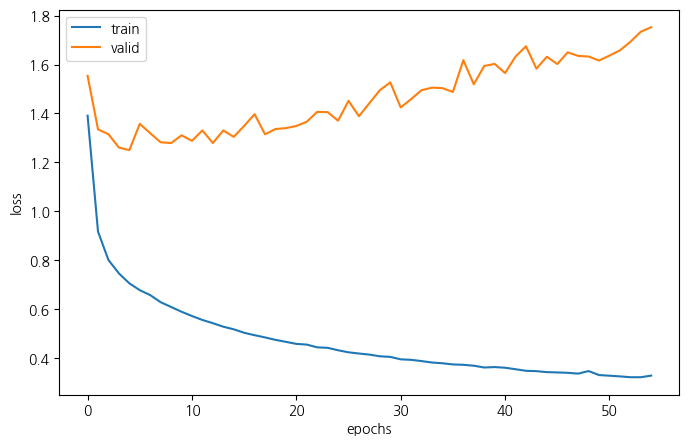

In [63]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience=50)
os.makedirs('./model', exist_ok=True) # 디렉토리 자동 생성
filepath = './model/whitewine_loss_{val_loss:.4f}__epoch_{epoch:04d}.keras'
model_save = ModelCheckpoint(filepath, save_best_only=True)
history = model.fit(rs_X_train, ot_smt_y_train, epochs=1000, 
                    batch_size=32, validation_data=(rs_X_valid, y_valid),
                    callbacks=[early_stop, model_save])
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.show()

# 저장된 best 모델 불러와서 사용하기

In [64]:
rs_X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2613,-0.337800,0.772063,1.752696,1.045876,0.617084,-0.051244,0.242181,0.706733,-0.681818,-0.551977,-0.616379
2361,1.345167,-0.289524,1.208226,0.033782,0.617084,-0.819912,-0.386251,0.492741,0.272727,0.867392,-0.497429
4245,0.714054,0.675555,1.298971,1.555908,-0.136666,0.614934,-0.154723,1.105910,-0.818182,0.236561,-0.695680
3947,-0.863728,0.193016,-0.062203,-0.213265,0.153238,0.563689,0.275256,-0.684214,0.409091,-0.236561,0.692077
3799,0.082941,0.193016,-0.425183,-0.213265,0.153238,-0.461200,0.854075,-0.243885,-0.090909,0.788538,0.176625
...,...,...,...,...,...,...,...,...,...,...,...
4502,0.188127,-0.289524,-0.152948,-0.197326,0.617084,0.102489,0.506784,-0.297383,-0.363636,0.315415,0.176625
3148,-0.758542,-0.482539,0.300776,2.177509,-0.020704,0.358711,0.076804,1.361054,0.045455,-0.315415,-0.854281
1562,0.188127,0.579047,1.480461,-0.324834,-0.716474,-0.204978,0.010653,-0.585448,0.363636,-1.103953,0.493826
37,0.082941,0.482539,-0.062203,-0.372650,0.791027,0.409956,0.209106,-0.461992,-0.409091,-1.498222,0.097324


In [65]:
from keras.models import load_model

In [66]:
best_model = load_model('./model/whitewine_loss_1.5536__epoch_0001.keras')
wine_pred = pd.DataFrame(best_model.predict(rs_X_test), columns=y_test.columns)
wine_pred

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


,3,4,5,6,7,8,9
0,0.098637,0.178032,0.538096,0.143424,0.035335,0.006392,0.000084
1,0.009574,0.559894,0.227763,0.166852,0.032817,0.002464,0.000636
2,0.277431,0.145332,0.311550,0.156696,0.083533,0.025185,0.000272
3,0.021434,0.022975,0.027612,0.110546,0.238428,0.552798,0.026207
4,0.008289,0.289374,0.116907,0.235479,0.223353,0.092028,0.034570
...,...,...,...,...,...,...,...
975,0.064120,0.155046,0.151996,0.188538,0.257678,0.162944,0.019678
976,0.320256,0.065708,0.289198,0.195554,0.073997,0.054709,0.000578
977,0.004217,0.017747,0.008425,0.185142,0.087773,0.191171,0.505526
978,0.156818,0.146635,0.182353,0.148370,0.154512,0.208815,0.002496


In [67]:
best_model.evaluate(rs_X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2718 - loss: 1.5872


[1.5728193521499634, 0.279591828584671]